**Orbitize Demo**

In this tutorial we will fit for the possible orbits of the companion HD 984 B, which has approximately 61 Jupiter masses.

First, we want to import orbitize's functionalities and read in the data file:

In [1]:
import numpy as np
import orbitize
from orbitize import driver, read_input, system, priors, sampler
import multiprocessing as mp


#get data from CSV file
data_table = read_input.read_file('{}/HD984B_Orbitize.csv'.format(orbitize.DATADIR))
data_table.pprint_all()

filename = "{}/HD984B_Orbitize.csv".format(orbitize.DATADIR)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


 epoch  object quant1 quant1_err quant2 quant2_err quant12_corr quant_type instrument
------- ------ ------ ---------- ------ ---------- ------------ ---------- ----------
56126.0      1  190.0       20.0  109.0        3.0          nan      seppa      defsp
56128.0      1  208.0       23.0  109.0        3.0          nan      seppa      defsp
56908.0      1  201.6        0.4   92.2        0.5          nan      seppa      defsp
57262.0      1  216.3        1.0   83.3        0.3          nan      seppa      defsp
57262.0      1  217.9        0.7   83.6        0.2          nan      seppa      defsp


Now that the code has read our planet's astrometry at each epoch, we can input the mass of the system (found from a paper; but you can also use http://exoplanet.eu/catalog/ to look for your system of interest!). We also want to input the MCMC parameters. Here we choose to fit for 6,000 possible orbits for HD 984 B, using 20 walkers (which essentially sample our possible parameter space - read <a href = "https://orbitize.readthedocs.io/en/latest/tutorials/MCMC_tutorial.html" >orbitize!'s  MCMC page</a> to find out how many temperatures and walkers to pick for convergence. For our example, we use only 20 walkers and 5 temperatures so the code doesn't take too long to run.

In [2]:
#HD 984 system parameters
num_secondary_bodies = 1
total_mass = 1.21 # [Msol]
plx = 21.781 # [mas]
mass_err = 0.06 # [Msol]
plx_err = 0.056 # [mas]

#MCMC Parameters - from orbitize! tutorial
num_temps=5
num_walkers=20
n_threads=2
n_orbs=6000 
burn_steps=10
thin=2

Now, we run our sampler, using the following code:

In [3]:
#start running the sampler
sys = system.System(
    num_secondary_bodies, data_table, total_mass,
    plx, mass_err=mass_err, plx_err=plx_err
)

lab = sys.param_idx
mcmc_sampler = sampler.MCMC(sys, num_temps, num_walkers, n_threads)


_ = mcmc_sampler.run_sampler(n_orbs, burn_steps=burn_steps, thin=10)

Starting Burn in
10/10 steps of burn-in complete
Burn in complete. Sampling posterior now.
300/300 steps completed
Run complete


Once the sampler is done running, we can plot our "corner plot" - each plot on the diagonal will give you the values of the estimated parameters for the orbit: semi-major axis, eccentricity, inclination, argument of periastron, longitude of ascending node, $\tau$ (which is orbitize!'s way of <a href = "https://orbitize.readthedocs.io/en/latest/faq/Time_Of_Periastron.html?highlight=periastron%20passage#Time-of-Periastron-and-Motivation-for-\tau" >calculating the epoch of periastron passage </a> - how far from periastron the planet is right now on a scale from 0 to 1), distance of the system and system mass.

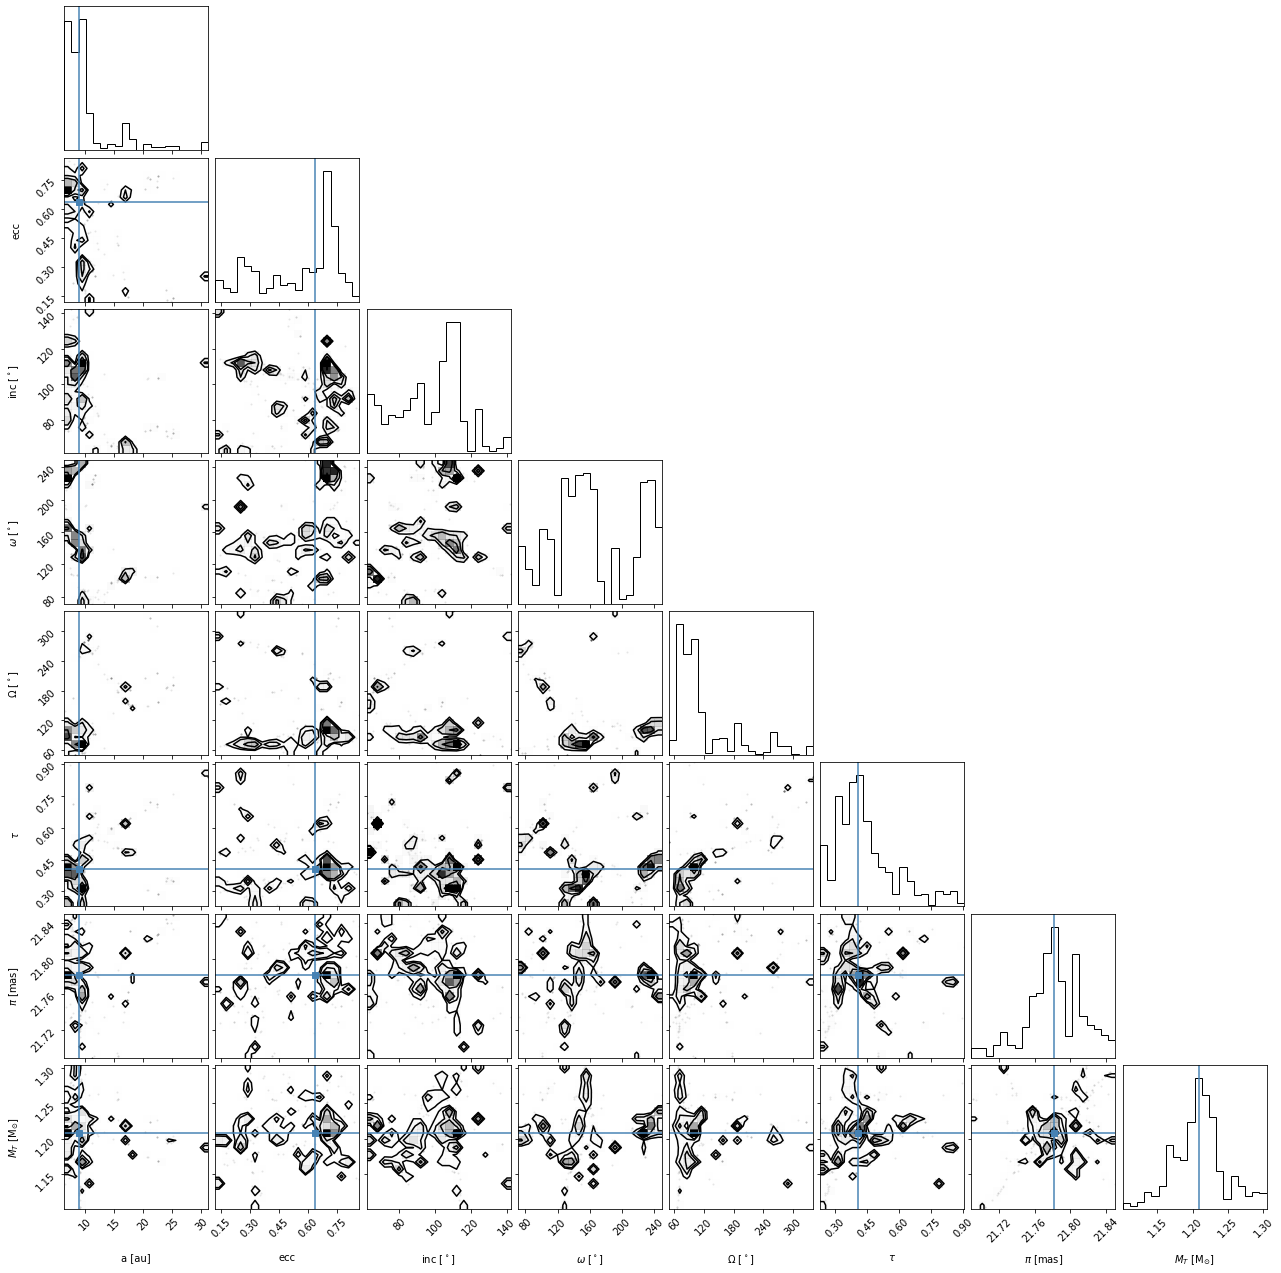

In [4]:
#plot the corner plot
median_values = np.median(mcmc_sampler.results.post,axis=0) # Compute median of each parameter
range_values = np.ones_like(median_values)*0.95 # Plot only 95% range for each parameter
corner_figure_median_95 = mcmc_sampler.results.plot_corner(range=range_values, truths=median_values)

Finally, we can visualize 100 of our possible orbits picked by the sampler using the orbit plotting functionality!

<Figure size 1008x432 with 0 Axes>

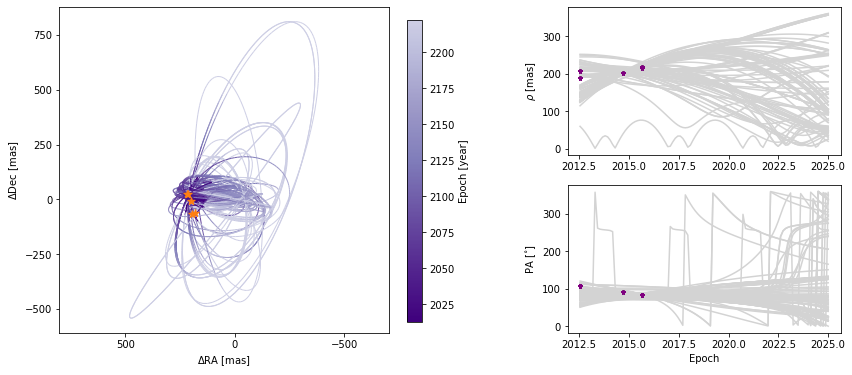

In [5]:
epochs = data_table['epoch']
orbit_plot_fig = mcmc_sampler.results.plot_orbits(
    object_to_plot = 1, # Plot orbits for the first (and only, in this case) companion
    num_orbits_to_plot= 100, # Will plot 100 randomly selected orbits of this companion
    start_mjd=epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    show_colorbar = True
)

 This tutorial was written by Clarissa Do O for Astrobites and is based on orbitize!'s official tutorial from the documentation 